# Binary Trees

In [4]:
from algopy import bintree
from algopy.bintree import BinTree

from bintrees_examples import B_ex, B_tuto

ModuleNotFoundError: No module named 'bintrees_examples'

In [1]:
BinTree??

Object `BinTree` not found.


In [3]:
B = BinTree(2, 
            BinTree(3, None, None),
            BinTree(4, 
                   BinTree(5, None, None), 
                   None))

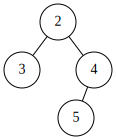

In [4]:
bintree.display(B)

In [5]:
B.key

2

In [6]:
B.right.left.key

5

In [3]:
bintree.display(B_ex)

NameError: name 'B_ex' is not defined

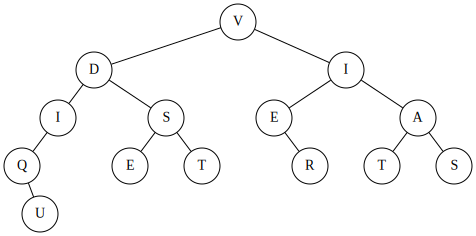

In [8]:
bintree.display(B_tuto)

## Measurements

###  Size

In [9]:
def size(B):
    """Computes size of a binary tree.
    
    - if tree is empty -> 0
    - else -> 1 + size(left_child) + size(right_child)
    """
    if B is None:
        return 0
    else:
        return 1 + size(B.left) + size(B.right)

In [10]:
size(B)

4

In [11]:
size(B_ex)

11

In [12]:
size(B_tuto)

14

## Height

In [13]:
def height(B):
    """Computes height of a binary tree.
    
    - height of empty tree : -1
    - height of tree : 1 + max(left_call, right_call)
    """
    if B is None:
        return -1
    else:
        return 1 + max(height(B.left), height(B.right))

In [14]:
height(B)

2

In [15]:
height(B_ex)

4

In [16]:
height(B_tuto)

4

In [17]:
height(BinTree(2, None, None))

0

### Average paths length

In [18]:
def __apl(B, h):
    if B is None:
        return 0, 0
    else:
        left_call = __apl(B.left, h+1)
        right_call = __apl(B.right, h+1)
        
        return (h + left_call[0] + right_call[0],
                1 + left_call[1] + right_call[1])
    
def apl(B):
    """Computes average path length of a binary tree."""
    if B is None:
        raise Exception("Empty tree doesn't have an APL.")
    else:
        res = __apl(B, 0)
        return res[0] / res[1]

In [19]:
apl(B)

1.0

In [20]:
apl(B_ex)

2.090909090909091

In [21]:
apl(B_tuto)

2.2857142857142856

Computing external paths length.

In [22]:
def __epl(B, h):
    if B is None:
        return 0
    elif B.left is None and B.right is None:  # Same as B.right is B.left
        return h
    else:
        return __epl(B.left, h+1) + __epl(B.right, h+1)
        
def epl(B):
    """Computes external paths lengths of tree."""
    return __epl(B, 0)

Computing average external paths length.

In [23]:
def __aepl(B, h):
    if B is None:
        return 0, 0
    elif B.left is None and B.right is None:  # Same as B.right is B.left
        return h, 1
    else:
        left_call = __aepl(B.left, h+1)
        right_call =  __aepl(B.right, h+1)
        return left_call[0] + right_call[0], left_call[1] + right_call[1]
        
def aepl(B):
    """Computes external paths lengths of tree."""
    epl, nb_leaves = __aepl(B, 0)
    if nb_leaves == 0:
        raise Exception("No average external paths length for empty tree.")
    else:
        return epl / nb_leaves

## Max Branch Value

In [24]:
def max_branch_val(B):
    """Computes max branch value."""
    if B is None:
        return float('-inf')
    elif B.right is B.left:
        return B.key
    else:
        return B.key + max(max_branch_val(B.left), max_branch_val(B.right))

## Depth First Traversal

In [25]:
def __dfs_template(B, pref, ino, post, leaves, Nones):
    if B is None:  # Generic stopping case
        pass
        # Nones.append(None)
    else:
        if B.right is B.left: # I'm at a leaf
            leaves.append(B.key)  # leaf treatment
        pref.append(B.key) # preorder treatment   
        __dfs_template(B.left, pref, ino, post, leaves, Nones)
        ino.append(B.key)  # inorder treatment
        __dfs_template(B.right, pref, ino, post, leaves, Nones)
        post.append(B.key) # postorder treatment

def dfs_template(B):
    """Template for DFS."""
    pref, ino, post, leaves, Nones = [], [], [], [], []
    __dfs_template(B, pref, ino, post, leaves, Nones)
    return pref, ino, post, leaves, Nones

In [26]:
dfs_template(B_tuto)

(['V', 'D', 'I', 'Q', 'U', 'S', 'E', 'T', 'I', 'E', 'R', 'A', 'T', 'S'],
 ['Q', 'U', 'I', 'D', 'E', 'S', 'T', 'V', 'E', 'R', 'I', 'T', 'A', 'S'],
 ['U', 'Q', 'I', 'E', 'T', 'S', 'D', 'R', 'E', 'T', 'S', 'A', 'I', 'V'],
 ['U', 'E', 'T', 'R', 'T', 'S'],
 [])

In [27]:
def save_algo(B):
    """Serializes tree in aglo format."""
    if B is None:
        return "_"
    else:
        s = "<" + str(B.key) + ","  # preorder treatment
        s += save_algo(B.left)
        s += ","                    # inorder treatment
        s += save_algo(B.right)
        s += ">"                    # postorder treatment
        return s

In [28]:
def save_algo_bis(B):
    """Serializes tree in aglo format."""
    if B is None:
        return "_"
    else:
        return ("<" + str(B.key) + "," +
                save_algo(B.left) + "," + save_algo(B.right) +
                ">")                

In [29]:
save_algo(B)

'<2,<3,_,_>,<4,<5,_,_>,_>>'

In [30]:
save_algo(B_ex)

'<1,<2,<4,<8,_,_>,_>,<5,_,<11,_,_>>>,<3,<6,_,_>,<7,<14,_,<29,_,_>>,_>>>'

In [31]:
save_algo(B_tuto)

'<V,<D,<I,<Q,_,<U,_,_>>,_>,<S,<E,_,_>,<T,_,_>>>,<I,<E,_,<R,_,_>>,<A,<T,_,_>,<S,_,_>>>>'

## Breadth First Traversal

In [32]:
from algopy import queue
from algopy.queue import Queue

In [33]:
queue??

In [34]:
q = Queue()

In [35]:
for i in range(56, 102):
    q.enqueue(chr(i))

In [36]:
while not q.isempty():
    print(q.dequeue(), end=" ")

8 9 : ; < = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e 

In [37]:
def BFT_template(B):
    """Breadth first traversal of tree."""
    q = Queue()
    if B is not None:
        q.enqueue(B)
    while not q.isempty():
        node = q.dequeue()
        print(str(node.key), end=" ")
        if node.left is not None:
            q.enqueue(node.left)
        if node.right is not None:
            q.enqueue(node.right)

In [38]:
BFT_template(B_tuto)

V D I I S E A Q E T R T S U 

In [39]:
def BFT_template_levels(B):
    """Breadth first traversal of tree with level detection."""
    q = Queue()
    if B is not None:
        q.enqueue(B)
        q.enqueue(None)
    while not q.isempty():
        node = q.dequeue()
        if node is not None:
            print(str(node.key), end=" ")
            if node.left is not None:
                q.enqueue(node.left)
            if node.right is not None:
                q.enqueue(node.right)
        else:
            if not q.isempty():
                q.enqueue(None)
                print()

In [40]:
BFT_template_levels(B_tuto)

V 
D I 
I S E A 
Q E T R T S 
U 

In [41]:
def width(B):
    """Compute width of tree."""
    q = Queue()
    maxi = 0
    size_level = 0
    if B is not None:
        q.enqueue(B)
        q.enqueue(None)
    while not q.isempty():
        node = q.dequeue()
        if node is not None:
            size_level += 1
            if node.left is not None:
                q.enqueue(node.left)
            if node.right is not None:
                q.enqueue(node.right)
        else:
            if not q.isempty():
                q.enqueue(None)
                if size_level > maxi:
                    maxi = size_level
                size_level = 0
    return maxi

In [42]:
for tree in [None, B, B_tuto, B_ex]:
    print(width(tree), end = " ")

0 2 6 4 

In [43]:
def BFS_levels(B):
    """Breadth first traversal detecting level shifts."""
    q = Queue()
    f = Queue()
    if B is not None:
        q.enqueue(B)
    while not q.isempty():
        node = q.dequeue()
        print(node.key, end=" ")
        if node.left is not None:
            f.enqueue(node.left)
        if node.right is not None:
            f.enqueue(node.right)
        if q.isempty():
            f, q = q, f
            print()

In [44]:
BFS_levels(B_tuto)

V 
D I 
I S E A 
Q E T R T S 
U 


## Check for equality

In [45]:
def is_equal(A, B):
    """Checks whether A and B are equal trees."""
    if A is B:
        return True
    elif A is None or B is None :
        return False
    else:
        if A.key == B.key :
            return is_equal(A.right, B.right) and is_equal(A.left, B.left)
        else: 
            return False

### Check for whether we are a subtree

In [46]:
# IN CASE B MIGHT HAVE TWO EQUAL KEYS
def __is_subtree(sub, B):
    """Checks whether sub is a subtree of B."""
    if B is None:
        return False
    else:
        if not is_equal(sub, B):
            return __is_subtree(sub, B.left) or __is_subtree(sub, B.right)
        else:
            return True

def is_subtree(sub, B):
    if sub is None:
        return True
    else:
        return __is_subtree(sub, B)

In [47]:
# ALTERNATIVE CASE IF THERE ARE NO TWO EQUAL KEYS IN B
def __is_subtree(sub, B):
    """Checks whether sub is a subtree of B."""
    if B is None:
        return False
    else:
        if sub.key == B.key:
            return is_equal(sub, B)
        else:
            return __is_subtree(sub, B.left) or __is_subtree(sub, B.right)

def is_subtree(sub, B):
    if sub is None:
        return True
    else:
        return __is_subtree(sub, B)

## Check for symmetry

In [83]:
def __is_symmetric(A, B):
    if A is B:
        return True
    elif A is None or B is None:
        return False
    else:
        if A.key == B.key:
            return __is_symmetric(A.left, B.right) and __is_symmetric(A.right, B.left)
        else:
            return False
        
def is_symmetric(B):
    """Tests whether B is symmetric."""
    if B is None:
        return True
    else:
        return __is_symmetric(B.left, B.right)

## Is Degenerate

In [1]:
def is_degenerate(B):
    """Tests whether a tree is degenerate."""
    if B is None:
        return True
    else:
        if B.left is not None and B.right is not None:
            return False
        else:
            return is_degenerate(B.left) and is_degenerate(B.right)

## Is Pefect

Testing whether tree is perfect.

In [3]:
# Using Height once
def __height_left(B):
    depth = -1
    while B is not None:
        B = B.left
        depth += 1
    return depth

def __is_perfect_h(B, h):
    if B is None:
        return h == -1
    else:
        return __is_perfect_h(B.left, h-1) and __is_perfect_h(B.right, h-1)

def is_perfect_h(B):
    return __is_perfect_h(B, __height_left(B))

# Wihtout using height
def __is_perfect(B):
    if B is None:
        return True, -1
    else:
        ok, depth_l = __is_perfect(B.left)
        if not ok:
            return False, -42
        else:
            ok, depth_r = __is_perfect(B.right)
            return ok and depth_l == depth_r, 1 + depth_l

def is_perfect(B):
    return __is_perfect(B)[0]

## Is Complete?

This is a BFT checking fro completeness of a tree. It is one of the most optimized versions. It needs some time to read.

In [ ]:
def check_complete(B):
    complete = True
    level_start = True
    end_of_leaves = False  # Check when we've got no leaves on the right of last level
    q = Queue()
    f = Queue()
    if B is not None:
        q.enqueue(B)
    while complete and not q.isempty():
        node = q.dequeue()
        if node.left is not None:
            if f.isempty() or end_of_leaves:   
                complete = level_start and not end_of_leaves  # Hideous: but need to know we did not start a new level
                                                              # after endOfLeaves signal.
            f.enqueue(node.left)
        else:
            end_of_leaves = True
        level_start = False
        if node.right is not None:
            if f.isempty() or end_of_leaves:
                complete = False
            f.enqueue(node.right)
        else:
            end_of_leaves = True 
        if q.isempty():
            q, f = f, q
            level_start = True                
    return complete

## Serialization

In [49]:
def __serialize(B, L):
    if B is None:
        L.append(None)
    else:
        L.append(str(B.key))
        __serialize(B.left, L)
        __serialize(B.right, L)
        
def serialize(B):
    """Serializes tree using preorder encounter of keys,"""
    L = []
    if B is not None:
        __serialize(B, L)
    return L

In [50]:
serialize(B)

['2', '3', None, None, '4', '5', None, None, None]

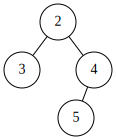

In [51]:
bintree.display(B)

In [52]:
def __deserialize(L, i):
    if L[i] is None:
        return None, i
    else:
        node = BinTree(L[i], None, None)
        left, i = __deserialize(L, i+1)
        right, i = __deserialize(L, i+1)
        node.left, node.right = left, right
        return node, i
    
def deserialize(L):
    """Built up tree out of preorder serialization."""
    if L == []:
        return None
    else:
        return __deserialize(L, 0)[0]

In [53]:
B_test = deserialize(serialize(B))

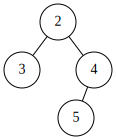

In [54]:
bintree.display(B_test)

## BinTreeSize

In [55]:
class BinTreeSize():
    """Class to implement binary trees together with size in the node."""
    def __init__(self, key, left, right, size):
        self.key = key
        self.left = left
        self.right = right
        self.size = size

In [56]:
BinTree??

In [57]:
def __toBinTreeSize(B):
    if B is None:
        return None, 0
    else:
        B_size = BinTreeSize(B.key, None, None, -1)
        l_call = __toBinTreeSize(B.left) 
        r_call = __toBinTreeSize(B.right)
        B_size.left, B_size.right = l_call[0], r_call[0]
        B_size.size = 1 + l_call[1] + r_call[1]
        return B_size, B_size.size
    
def toBinTreeSize(B):
    """Transforms BinTree object into BinTreeSize object."""
    if B is None:
        return None
    else:
        return __toBinTreeSize(B)[0]

## Hierarchical ordering

In [62]:
def __dfs_template_H(L, i, m, pref, ino, post):
    """Template for DFS."""
    if i < m and L[i] is not None:
        pref.append(L[i]) # preorder treatment   
        __dfs_template_H(L, 2*i+1, m, pref, ino, post)
        ino.append(L[i])  # inorder treatment
        __dfs_template_H(L, 2*i+2, m, pref, ino, post)
        post.append(L[i]) # postorder treatment

def dfs_template_H(L):
    pref, ino, post = [], [], []
    __dfs_template_H(L, 0, len(L), pref, ino, post)
    return pref, ino, post

In [63]:
dfs_template_H(L)

([22, 5, 3, 1, 4, 12, 17, 29, 23],
 [1, 3, 4, 5, 12, 17, 22, 23, 29],
 [1, 4, 3, 17, 12, 5, 23, 29, 22])

Breadth first traversal using implementation.

In [60]:
def BFT_aslist_H(L):
    for element in L:
        if element is not None:
            print(element, end=" ")

In [61]:
L = [22, 5, 29, 3, 12, 23, None, 1, 4, None, 17]

In [64]:
BFT_aslist_H(L)

22 5 29 3 12 23 1 4 17 

In [65]:
def BFT_template_H(L):
    """Breadth first traversal of tree."""
    i, m = 0, len(L)
    q = Queue()
    if L != []: # Checking whether tree is empty
        q.enqueue(i)
    while not q.isempty():
        h_index = q.dequeue()
        print(L[h_index], end=" ")
        next_index = 2*h_index + 1
        if next_index < m and L[next_index] is not None:
            q.enqueue(next_index)
        next_index = next_index + 1
        if next_index < m and L[next_index] is not None:
            q.enqueue(next_index)

In [66]:
BFT_template_H(L)

22 5 29 3 12 23 1 4 17 

### From Hierarchical List to Object

In [67]:
def __fromH_toO(L, i, m):
    if i >= m or L[i] is None:
        return None
    else:
        node = BinTree(L[i], None, None)
        node.left = __fromH_toO(L, 2*i+1, m)
        node.right = __fromH_toO(L, 2*i+2, m)
        return node

def fromH_toO(L):
    """Building tree out of hierarchical ordering."""
    if L == []:
        return None
    else:
        return __fromH_toO(L, 0, len(L))

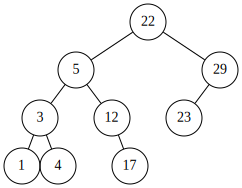

In [68]:
bintree.display(fromH_toO(L))

In [81]:
def __fromO_toH(B, L, i, m):
    for k in range(i-m+1):
        L.append(None)
        m += 1
    if B is None:
        L[i] = B
        return m
    else:
        L[i] = B.key
        m = __fromO_toH(B.left, L, 2*i+1, m)
        m = __fromO_toH(B.right, L, 2*i+2, m)
        return m

def fromO_toH(B):
    L = []
    m = __fromO_toH(B, L, 0, 0)
    if m != 0:
        while L[m-1] is None:
            L.pop()
            m -= 1
    return L

In [82]:
fromO_toH(fromH_toO(L))

[22, 5, 29, 3, 12, 23, None, 1, 4, None, 17]